### What needs to happen:
make the whole file into a huge binary mask? 
want to cutoff at 200x200 borders, instead of whole polygons as masks. 

- generate 200x200 all polygons as in normal data method
- do overlay with the jsoin intersection method 
- keep the intersections as labels per 200x200 polygon. 

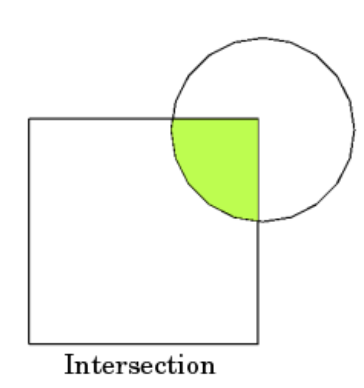

In [1]:
import geopandas as gpd

polygon_path = "/home/nadjaflechner/Palsa_data/Ground_truth/all_polygs.shp"
all_polygs = gpd.read_file(polygon_path)
rutor_path = "/home/nadjaflechner/Palsa_data/Ground_truth/gt_polygons.shp"
rutor = gpd.read_file(rutor_path)


In [2]:
all_polygs['centroid'] = all_polygs.representative_point()

In [39]:
all_polygs.geometry[0].bounds

(688149.8104874288, 7494524.192531442, 688161.7818712636, 7494544.942930089)

In [11]:
rutor

,fid,geometry
0,1.0,"POLYGON ((688153.003 7494543.985, 688156.195 7..."
1,2.0,"POLYGON ((688224.672 7494541.751, 688227.545 7..."
2,3.0,"POLYGON ((688267.396 7494608.205, 688268.992 7..."
3,4.0,"POLYGON ((688303.097 7494634.861, 688306.769 7..."
4,5.0,"POLYGON ((688326.721 7494645.077, 688329.754 7..."
5,6.0,"POLYGON ((688358.166 7494638.533, 688358.964 7..."
6,7.0,"POLYGON ((688305.412 7494613.512, 688307.008 7..."
7,8.0,"POLYGON ((688501.782 7494774.807, 688505.773 7..."
8,9.0,"POLYGON ((688578.798 7494787.018, 688580.794 7..."
9,10.0,"POLYGON ((571335.401 7464434.536, 571334.124 7..."


In [16]:
intersect = gpd.overlay(all_polygs, rutor.iloc[[0]], how='intersection')

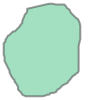

In [32]:
intersect.geometry[15]

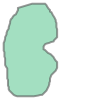

In [11]:
all_polygs.geometry[0]

In [7]:
type(all_polygs.geometry[0])

shapely.geometry.polygon.Polygon

In [ ]:
import rasterio.features
import matplotlib.pyplot as plt

poly = all_polygs.geometry[0]
img = rasterio.features.rasterize([poly], out_shape=(200, 200))
plt.imshow(img)

Plan:
- find intersection of groundtruth polygons with current 200x200 polygon USING sjoin intersection
- make polygon into geotiff / raster of only 0's
- then use rasterio.mask to mask the 200x200 image with the intersection(s)

In [8]:
all_polygs.geometry[0].crs

AttributeError: 'Polygon' object has no attribute 'crs'

In [ ]:
import numpy as np 

ones = np.ones((200,200))

In [29]:
import rasterio
img = rasterio.open('/home/nadjaflechner/Palsa_data/generated_datasets/FINAL_200m_dataset/hs/732_52_5000_2015_negcrop_0.tif')

In [31]:
img*0

TypeError: unsupported operand type(s) for *: 'DatasetReader' and 'int'

In [26]:
np_img*0

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)